# Multi-Layer Perceptron

## Recap: simple perceptron
Recall that a [perceptron](perceptron.ipynb) is a neurally inspired computation device introduced in 1957 by Frank Rosenblatt. Given enough examples, a perceptron learns to distinguish members of class A from members of class B **if** these **classes are linearly separable**. It turns out, however, that even some very simple functions do not have this property.

## The XOR problem
The plot below shows the output of the XOR function. It is easy to see that there exists no line able to separate XOR's _True_ outputs (class A) from its _False_ outputs (class B). This is because these classes are not linearly separable.  

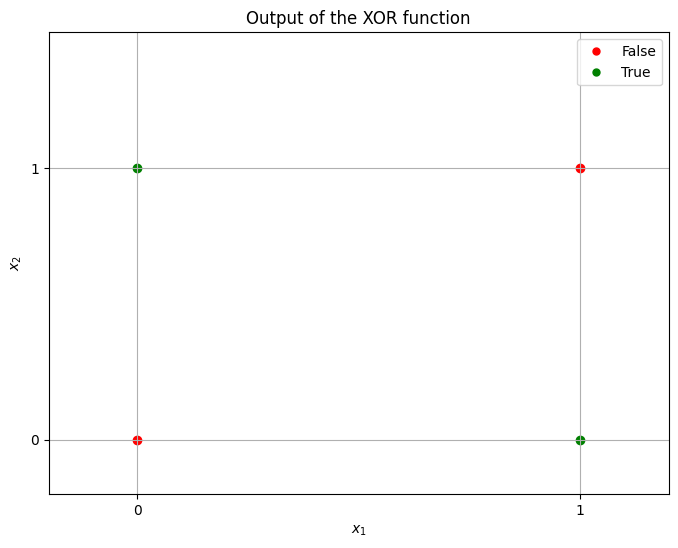

In [22]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Inputs and corresponding outputs for an XOR gate
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
outputs = [0, 1, 1, 0]

# Colors for the outputs
colors = ['green' if output else 'red' for output in outputs]

# Setup the figure
plt.figure(figsize=(8, 6))
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.5)
plt.title('Output of the XOR function')

# Plot the inputs and outputs
for (x, y), color in zip(inputs, colors):
    plt.scatter(x, y, color=color)

# Set the labels for the axes
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Set the locations of the x and y axis ticks
plt.xticks([0, 1])
plt.yticks([0, 1])

# Create custom legend
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='False')
green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='True')
plt.legend(handles=[red_dot, green_dot])

# Show the plot
plt.grid(True)
plt.show()

In the 1960s, this led to a search for classification approaches using **multi-layer** perceptrons.

The researchers found that a feedforward perceptron with 2 adjustable layers of weights can correctly classify any finite number of classes if there is a sufficient number of "hidden" perceptrons in the layer mediating between the input and the output.

## The Multi-Layer Perceptron
A **Multi-Layer Perceptron** (MLP) consists of:
* An **input layer**,
* One or more so-called **hidden layers**, and
* An **output layer**.

The illustration below shows an example MLP with one hidden layer.

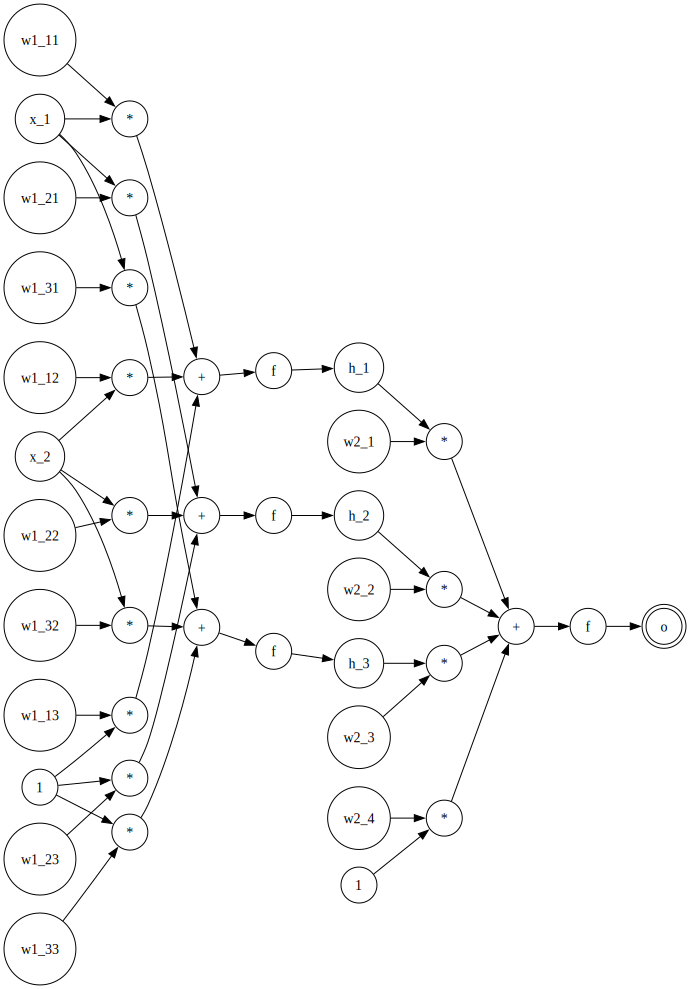

In [43]:
%matplotlib inline
from graphviz import Digraph

dot = Digraph('multi-layer-perceptron', graph_attr={'rankdir': 'LR'}, comment='Multi-layer perceptron')

dot.node('x_1', 'x_1', shape='circle')
dot.node('x_2', 'x_2', shape='circle')
dot.node('x_3', '1', shape='circle')

dot.node('w_11', 'w1_11', shape='circle')
dot.node('w_12', 'w1_12', shape='circle')
dot.node('w_13', 'w1_13', shape='circle')

dot.node('m11', '*', shape='circle')
dot.node('m12', '*', shape='circle')
dot.node('m13', '*', shape='circle')

dot.node('sum11', '+', shape='circle')
dot.node('act11', 'f', shape='circle')
dot.node('h1', 'h_1', shape='circle')


dot.node('w_21', 'w1_21', shape='circle')
dot.node('w_22', 'w1_22', shape='circle')
dot.node('w_23', 'w1_23', shape='circle')

dot.node('m21', '*', shape='circle')
dot.node('m22', '*', shape='circle')
dot.node('m23', '*', shape='circle')

dot.node('sum21', '+', shape='circle')
dot.node('act21', 'f', shape='circle')
dot.node('h2', 'h_2', shape='circle')


dot.node('w_31', 'w1_31', shape='circle')
dot.node('w_32', 'w1_32', shape='circle')
dot.node('w_33', 'w1_33', shape='circle')

dot.node('m31', '*', shape='circle')
dot.node('m32', '*', shape='circle')
dot.node('m33', '*', shape='circle')

dot.node('sum31', '+', shape='circle')
dot.node('act31', 'f', shape='circle')
dot.node('h3', 'h_3', shape='circle')

dot.node('w_41', 'w2_1', shape='circle')
dot.node('w_42', 'w2_2', shape='circle')
dot.node('w_43', 'w2_3', shape='circle')
dot.node('w_44', 'w2_4', shape='circle')
dot.node('h4', '1', shape='circle')

dot.node('m41', '*', shape='circle')
dot.node('m42', '*', shape='circle')
dot.node('m43', '*', shape='circle')
dot.node('m44', '*', shape='circle')

dot.node('sum41', '+', shape='circle')
dot.node('act41', 'f', shape='circle')
dot.node('o', 'o', shape='doublecircle')


# Edges

dot.edge('x_1', 'm11')
dot.edge('w_11', 'm11')
dot.edge('x_2', 'm12')
dot.edge('w_12', 'm12')
dot.edge('x_3', 'm13')
dot.edge('w_13', 'm13')

dot.edge('m11', 'sum11')
dot.edge('m12', 'sum11')
dot.edge('m13', 'sum11')

dot.edge('sum11', 'act11')
dot.edge('act11', 'h1')


dot.edge('x_1', 'm21')
dot.edge('w_21','m21')
dot.edge('x_2', 'm22')
dot.edge('w_22', 'm22')
dot.edge('x_3', 'm23')
dot.edge('w_23', 'm23')

dot.edge('m21', 'sum21')
dot.edge('m22', 'sum21')
dot.edge('m23', 'sum21')

dot.edge('sum21', 'act21')
dot.edge('act21', 'h2')


dot.edge('x_1', 'm31')
dot.edge('w_31','m31')
dot.edge('x_2', 'm32')
dot.edge('w_32','m32')
dot.edge('x_3', 'm33')
dot.edge('w_33','m33')

dot.edge('m31', 'sum31')
dot.edge('m32', 'sum31')
dot.edge('m33', 'sum31')

dot.edge('sum31', 'act31')
dot.edge('act31', 'h3')


dot.edge('h1', 'm41')
dot.edge('w_41','m41')
dot.edge('h2', 'm42')
dot.edge('w_42','m42')
dot.edge('h3', 'm43')
dot.edge('w_43','m43')
dot.edge('h4', 'm44')
dot.edge('w_44','m44')


dot.edge('m41', 'sum41')
dot.edge('m42', 'sum41')
dot.edge('m43', 'sum41')
dot.edge('m44', 'sum41')


dot.edge('sum41', 'act41')
dot.edge('act41', 'o')


dot

Here's a simplified illustration of the above MLP (each edge has an associated weight that is learned by the MLP):

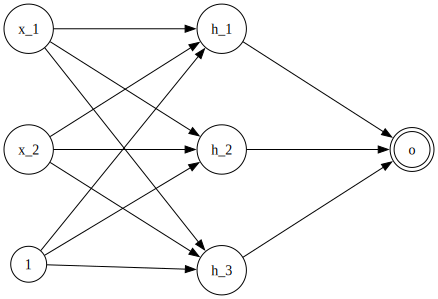

In [55]:
# Create a new directed graph
dot = Digraph('multi-layer-perceptron-simplified', graph_attr={'rankdir': 'LR', 'ranksep': '2', 'nodesep': '1'}, comment='Multi-layer perceptron (simplified)')

# Add nodes for the input layer
for i in range(1, 3):
    dot.node(f'I{i}', f'x_{i}', shape='circle')

dot.node(f'I3', '1', shape='circle')

# Add nodes for the hidden layer
for i in range(1, 4):
    dot.node(f'H{i}', f'h_{i}', shape='circle')

# Add node for the output layer
dot.node('O', 'o', shape='doublecircle')

# Connect the nodes from the input layer to the hidden layer
for i in range(1, 3):
    for j in range(1, 4):
        dot.edge(f'I{i}', f'H{j}')

dot.edge(f'I3', f'H1')
dot.edge(f'I3', f'H2')
dot.edge(f'I3', f'H3')

# Connect the nodes from the hidden layer to the output layer
for i in range(1, 4):
    dot.edge(f'H{i}', 'O')

# Show the graph
dot

## The XOR problem revisited

Let's see how an MLP with just 1 hidden layer is able to separate outputs of the XOR function. The graph below shows an MLP with specific weights to accomplish this.

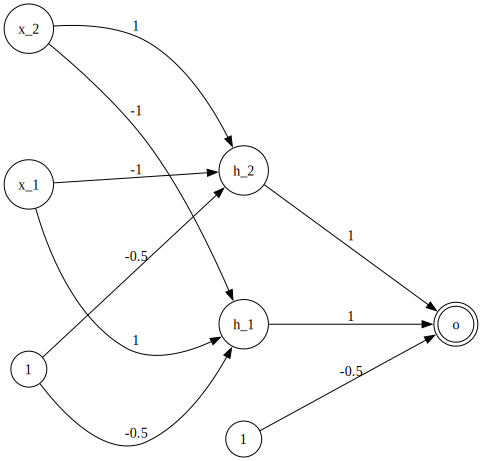

In [62]:
# Create a new directed graph
dot = Digraph('mlp-xor', graph_attr={'rankdir': 'LR', 'ranksep': '2', 'nodesep': '1'}, comment='MLP for XOR function')

# Add nodes for the input layer
for i in range(1, 3):
    dot.node(f'I{i}', f'x_{i}', shape='circle')

dot.node(f'I3', '1', shape='circle')

# Add nodes for the hidden layer
for i in range(1, 3):
    dot.node(f'H{i}', f'h_{i}', shape='circle')

dot.node(f'H3', '1', shape='circle')

# Add node for the output layer
dot.node('O', 'o', shape='doublecircle')

# Connect the nodes from the input layer to the hidden layer
dot.edge(f'I1', f'H1', label='1')
dot.edge(f'I1', f'H2', label='-1')
dot.edge(f'I2', f'H1', label='-1')
dot.edge(f'I2', f'H2', label='1')
dot.edge(f'I3', f'H1', label='-0.5')
dot.edge(f'I3', f'H2', label='-0.5')

# Connect the nodes from the hidden layer to the output layer
dot.edge(f'H1', 'O', label='1')
dot.edge(f'H2', 'O', label='1')
dot.edge(f'H3', 'O', label='-0.5')

# Show the graph
dot

Let's check that the above MLP actually solves the XOR problem for inputs $x=(1,0)$ and $x=(1,1)$. Recall that the perceptron has an activation function $f$. In this example, we use a and activation function with outputs a 1 whenever the perceptron's input (the weighted sum) is larger than zero, and 0 otherwise.

For $x=(1,0)$, we have 
$$h_1 = f(1\cdot 1 + 0 \cdot -1 + 1 \cdot -0.5) = f(0.5) = 1$$

and 

$$h_2 = f(1 \cdot -1 + 0 \cdot 1 + 1 \cdot -0.5) = f(-1.5)=0$$

With that, we have:

$$o=f(1 \cdot 1 + 0 \cdot 1 + 1 \cdot -0.5) = f(0.5) = 1$$

For $x=(1,1)$, on the other hand, we have 
$$h_1 = f(1\cdot 1 + 1 \cdot -1 + 1 \cdot -0.5) = f(-0.5) = 0$$

and 

$$h_2 = f(1 \cdot -1 + 1 \cdot 1 + 1 \cdot -0.5) = f(-0.5) = 0$$

And with that, we have:

$$o=f(0 \cdot 1 + 0 \cdot 1 + 1 \cdot -0.5) = f(-0.5) = 0$$

## Learning the weights

Now that we know that an MLP is much more capable than a single perceptron, the question is how the weights can be learned. Unfortunately, when the search for such an algorithm began in the 1960s, not even a moderately efficient algorithm could be found for MLPs which had fewer hidden perceptrons than cases to be learned.